<a href="https://colab.research.google.com/github/osama-kheshaifaty/SPE-KSA-WORKSHOP-2025/blob/main/quad_dca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

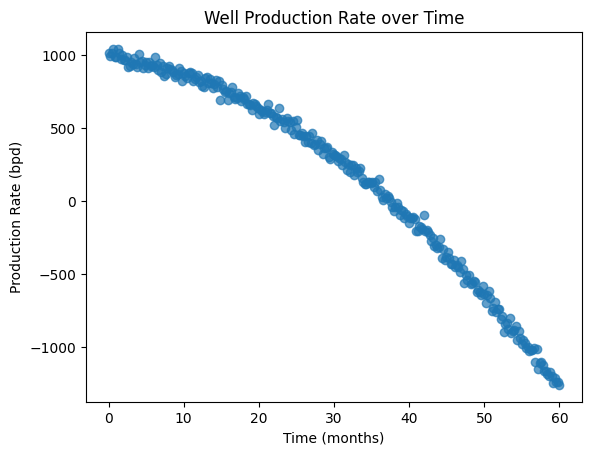


Mean Squared Error (MSE): 599.08
R-squared (R²): 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


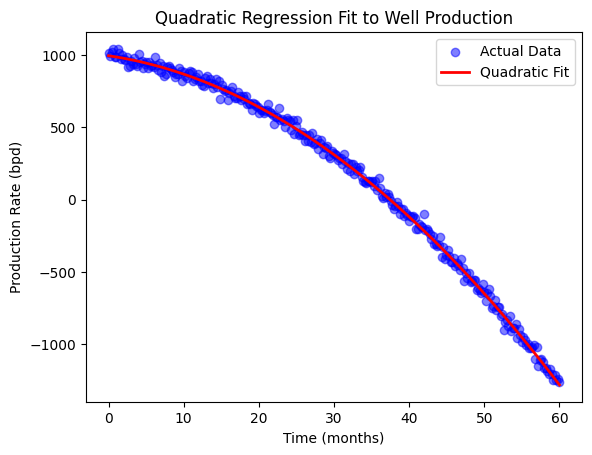

In [1]:
# Oil & Gas ML Example: Predicting Well Production Decline with Quadratic Regression
# ----------------------------------------------------------------------------------

# Step 1: Import Required Libraries
# ----------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Generate Synthetic Dataset
# -----------------------------------
# Context:
# - In many oil wells, production rate declines over time,
#   but the decline is **not purely linear**.
# - Early production might be relatively flat, then drops sharply.
# - Quadratic (2nd degree polynomial) regression can capture this curvature.

np.random.seed(42)

n_samples = 300

# Time in months since production started
time_months = np.linspace(0, 60, n_samples)  # 0 to 5 years

# Simulate production rate with a quadratic decline shape
# (initial rate - small linear drop - accelerating drop)
production_rate = (
    1000 - 8*time_months - 0.5*(time_months**2)
    + np.random.normal(0, 30, n_samples)  # add random noise
)

# Create a DataFrame
df = pd.DataFrame({
    'Time (months)': time_months,
    'Production Rate (bpd)': production_rate
})

# Step 3: Visualize the Data
# ----------------------------
plt.scatter(df['Time (months)'], df['Production Rate (bpd)'], alpha=0.7)
plt.title('Well Production Rate over Time')
plt.xlabel('Time (months)')
plt.ylabel('Production Rate (bpd)')
plt.show()

# Step 4: Prepare Features and Target
# -------------------------------------
X = df[['Time (months)']]  # Input feature must be 2D
y = df['Production Rate (bpd)']

# Step 5: Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Transform Features for Polynomial Regression
# -------------------------------------------------------
# Polynomial regression just means creating additional features:
# For degree 2: we create [x, x^2]
# So the model can learn curves, not just straight lines.

poly = PolynomialFeatures(degree=2)  # 2 = quadratic
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 7: Train the Quadratic Regression Model
# ---------------------------------------------
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 8: Make Predictions
# --------------------------
y_pred = model.predict(X_test_poly)

# Step 9: Evaluate the Model
# ----------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 10: Visualize the Quadratic Fit
# -------------------------------------
# We'll predict over the full range to draw a nice curve.

# Create a smooth range of inputs
X_curve = np.linspace(X['Time (months)'].min(), X['Time (months)'].max(), 500).reshape(-1,1)
X_curve_poly = poly.transform(X_curve)
y_curve_pred = model.predict(X_curve_poly)

# Plot actual points and fitted curve
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_curve, y_curve_pred, color='red', linewidth=2, label='Quadratic Fit')
plt.title('Quadratic Regression Fit to Well Production')
plt.xlabel('Time (months)')
plt.ylabel('Production Rate (bpd)')
plt.legend()
plt.show()